In [1]:
#pip install matplotlib

In [2]:
#pip install sklearn

In [3]:
#pip install utils

In [4]:
import sys
sys.path.append("C:/Users/abeli/anaconda3/envs/hello-tf/Lib/site-packages/utils")
import utils

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn 

from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

%matplotlib inline
#tf.logging.set_verbosity(tf.logging.ERROR)  <--- ERROR 

print('Libraries imported.')

Libraries imported.


In [6]:
column_names = ['serial', 'date', 'age', 'distance', 'stores', 'latitude', 'longitude', 'price']

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/daily_materials/tensorflow_keras_regression/data.csv'
                 , names = column_names)
df

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157
...,...,...,...,...,...,...,...,...
4995,4995,2007,17,6,3,90,125,13539
4996,4996,2016,7,10,0,85,129,14757
4997,4997,2017,6,10,5,90,125,14102
4998,4998,2010,37,3,5,81,128,14313


In [8]:
print('------------------------------')
print('shape: ', df.shape)
print('------------------------------')
print('info: ', df.info())

------------------------------
shape:  (5000, 8)
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   serial     5000 non-null   int64
 1   date       5000 non-null   int64
 2   age        5000 non-null   int64
 3   distance   5000 non-null   int64
 4   stores     5000 non-null   int64
 5   latitude   5000 non-null   int64
 6   longitude  5000 non-null   int64
 7   price      5000 non-null   int64
dtypes: int64(8)
memory usage: 312.6 KB
info:  None


In [9]:
df.isna().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

In [10]:
df = df.iloc[:, 1:]
df

,date,age,distance,stores,latitude,longitude,price
0,2009,21,9,6,84,121,14264
1,2007,4,2,3,86,121,12032
2,2016,18,3,7,90,120,13560
3,2002,13,2,2,80,128,12029
4,2014,25,5,8,81,122,14157
...,...,...,...,...,...,...,...
4995,2007,17,6,3,90,125,13539
4996,2016,7,10,0,85,129,14757
4997,2017,6,10,5,90,125,14102
4998,2010,37,3,5,81,128,14313


In [11]:
df_norm = (df - df.mean())/(df.std())
df_norm

,date,age,distance,stores,latitude,longitude,price
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266
...,...,...,...,...,...,...,...
4995,-0.350485,-0.171675,0.319454,-0.609312,1.590328,0.001831,-0.360156
4996,1.298598,-1.054324,1.569518,-1.563848,0.009045,1.264460,0.833055
4997,1.481830,-1.142588,1.569518,0.027045,1.590328,0.001831,0.191385
4998,0.199209,1.593622,-0.618094,0.027045,-1.255981,0.948803,0.398091


In [12]:
y_mean = df['price'].mean()
y_std = df['price'].std()

def convert_label_value(pred):
    return pred * y_std + y_mean

In [13]:
converted_prices = convert_label_value(df_norm['price'])

In [14]:
og_prices = df['price']

In [15]:
(converted_prices.where(converted_prices.values == og_prices.values).notna()).value_counts()

True    5000
Name: price, dtype: int64

In [16]:
# y a y

In [17]:
x = df_norm.iloc[:, :6]
x.head()

,date,age,distance,stores,latitude,longitude
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141


In [18]:
y = df_norm.iloc[:, -1:]
y.head()

,price
0,0.350088
1,-1.836486
2,-0.339584
3,-1.839425
4,0.245266


In [19]:
x_arr = x.values
y_arr = y.values

print('features array shape: ', x_arr.shape)
print('target array shape: ', y_arr.shape)

features array shape:  (5000, 6)
target array shape:  (5000, 1)


In [20]:
x_train, X_test, y_train, y_test = train_test_split(x_arr, y_arr, test_size = 0.05, random_state=0)
print('X_train: ', x_train.shape)
print('x_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (4750, 6)
x_test:  (250, 6)
y_train:  (4750, 1)
y_test:  (250, 1)


In [21]:
def get_model():
    model = Sequential([
        Dense(10, input_shape=(6,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)
        ])
    model.compile(
        loss='mse',
        optimizer='adam'
    )
    return model

get_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                70        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [23]:
# stop model from training for a long -long time
es_cb = EarlyStopping(monitor='val_loss', patience=5)

model = get_model()
preds_on_untrained = model.predict(X_test)

history = model.fit(
    x_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 100,
    callbacks = [es_cb]
)

Epoch 1/100
149/149 [==============================] - 2s 14ms/step - loss: 0.8764 - val_loss: 0.3919
Epoch 2/100
149/149 [==============================] - 1s 9ms/step - loss: 0.2390 - val_loss: 0.1674
Epoch 3/100
149/149 [==============================] - 1s 9ms/step - loss: 0.1736 - val_loss: 0.1585
Epoch 4/100
149/149 [==============================] - 1s 9ms/step - loss: 0.1648 - val_loss: 0.1527
Epoch 5/100
149/149 [==============================] - 1s 8ms/step - loss: 0.1611 - val_loss: 0.1537
Epoch 6/100
149/149 [==============================] - 1s 8ms/step - loss: 0.1587 - val_loss: 0.1504
Epoch 7/100
149/149 [==============================] - 1s 8ms/step - loss: 0.1577 - val_loss: 0.1481
Epoch 8/100
149/149 [==============================] - 1s 9ms/step - loss: 0.1559 - val_loss: 0.1465
Epoch 9/100
149/149 [==============================] - 1s 6ms/step - loss: 0.1551 - val_loss: 0.1470
Epoch 10/100
149/149 [==============================] - 1s 7ms/step - loss: 0.1545 - val_l

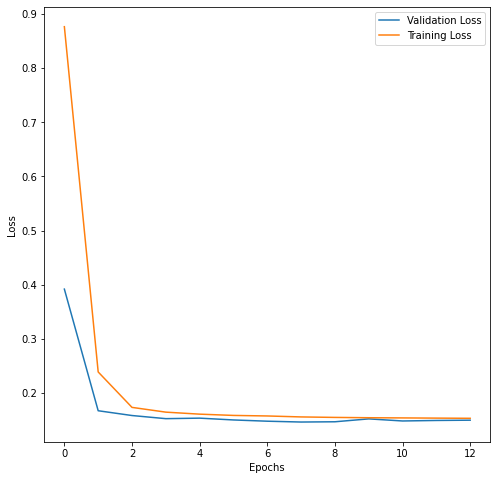

In [24]:
def plot_loss(history):
    h = history.history
    x_lim = len(h['loss'])
    plt.figure(figsize=(8, 8))
    plt.plot(range(x_lim), h['val_loss'], label = 'Validation Loss')
    plt.plot(range(x_lim), h['loss'], label = 'Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return

plot_loss(history)

In [25]:
def compare_predictions(preds1, preds2, y_test):
    plt.figure(figsize=(8, 8))
    plt.plot(preds1, y_test, 'ro', label='Untrained Model')
    plt.plot(preds2, y_test, 'go', label='Trained Model')
    plt.xlabel('Preds')
    plt.ylabel('Labels')

    y_min = min(min(y_test), min(preds1), min(preds2))
    y_max = max(max(y_test), max(preds1), max(preds2))

    plt.xlim([y_min, y_max])
    plt.ylim([y_min, y_max])
    plt.plot([y_min, y_max], [y_min, y_max], 'b--')
    plt.legend()
    plt.show()
    return

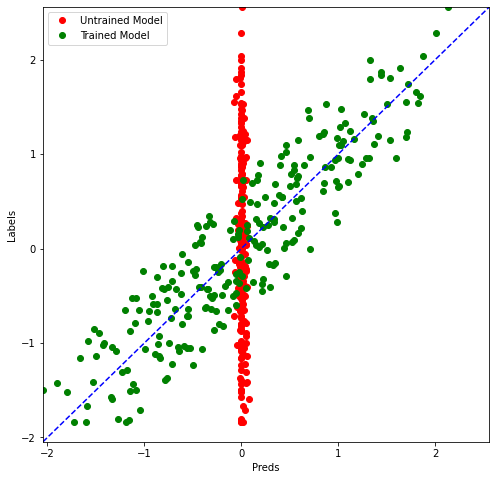

In [26]:
preds_on_trained = model.predict(X_test)
compare_predictions(preds_on_untrained, preds_on_trained, y_test)

In [27]:
def plot_predictions(preds, y_test):
    plt.figure(figsize=(8, 8))
    plt.plot(preds, y_test, 'ro')
    plt.xlabel('Preds')
    plt.ylabel('Labels')
    plt.xlim([-0.5, 0.5])
    plt.ylim([-0.5, 0.5])
    plt.plot([-0.5, 0.5], [-0.5, 0.5], 'b--')
    plt.show()
    return

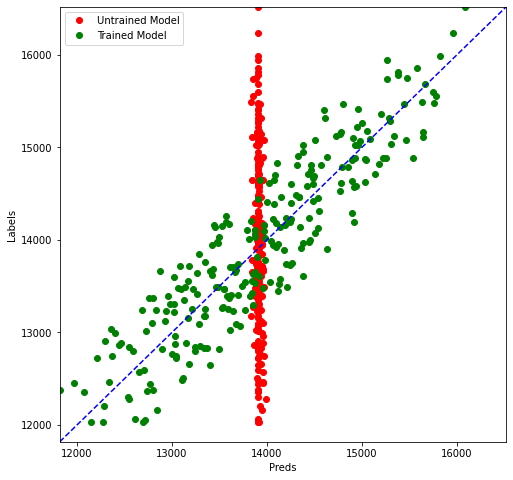

In [28]:
price_untrained = [convert_label_value(y) for y in preds_on_untrained]
price_trained = [convert_label_value(y) for y in preds_on_trained]
price_test = [convert_label_value(y) for y in y_test]

compare_predictions(price_untrained, price_trained, price_test)